In [2]:
from turtle import ht
import cv2  # pip install opencv-contrib-python
import numpy as np
import mediapipe as mp  # pip install mediapipe
import pyautogui    # pip install PyautoGUI
import matplotlib.pyplot as plt
from IPython.display import Image

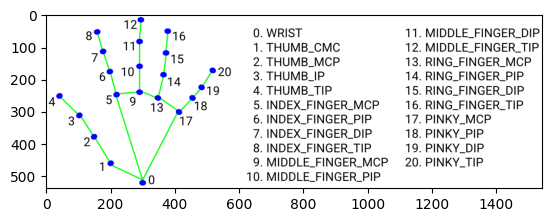

In [3]:
points = Image(url="C:\\Users\\sathe\\Downloads\\hand_landmarks.png")
points
img=cv2.imread("C:\\Users\\sathe\\Downloads\\hand_landmarks.png")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
cap = cv2.VideoCapture(0)   # capture video '0' one cam
hand_detector = mp.solutions.hands.Hands()  # detect hand
drawing_utils = mp.solutions.drawing_utils
screen_width, screen_height = pyautogui.size()
index_y = 0

In [5]:
'''Smoothen the movement of mouse to stop at the exact position of,
   our hand movement without any shake in the movement of the mouse'''
smoothening = 9
plocx, plocy = 0, 0
clocx, clocy = 0, 0 

In [6]:
while True:
    _, frame = cap.read()   # read data from cap
    '''Flip the frame or screen since the camera shows the mirror image,
       of our hand and moves in opposite direction so we need to flip the screen'''
    frame = cv2.flip(frame, 1)
     # shape gives frame height and width using shape 
    frame_height, frame_width, _ = frame.shape
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # detect on rgb frame color
    output = hand_detector.process(rgb_frame)
    hands = output.multi_hand_landmarks # hand landmark
    
    if hands:
        for hand in hands:
            drawing_utils.draw_landmarks(frame, hand)   # see landmarks on frame
            # we use our index finger tip move the mouse 
            landmarks = hand.landmark
            
            for id, landmark in enumerate(landmarks):   # add counter
                # show the landmarks on kernel in x and y axis
                # x and y axis is multiplies by the height and width to get the x and y axis on the frames
                x = int(landmark.x*frame_width)
                y = int(landmark.y*frame_height)
                # print(x,y)
                # Index finger tip point number is 8
                # and draw a boundary to the point a circle
                if id == 8:
                    cv2.circle(img=frame, center=(x,y), radius=15, color=(0, 255, 255))
                    # pyautogui.moveTo(x,y)
                    index_x = (screen_width/frame_width)*x
                    index_y = (screen_height/frame_height)*y
                    # co-ordinates need to be changed 
                    # smoothining varies with the change in the smoothening factor
                    clocx = plocx + (index_x - plocx) /smoothening
                    clocy = plocy + (index_y - plocy) /smoothening
                    pyautogui.moveTo(clocx, clocy)
                    plocx, plocy = clocx, clocy
                
                # thumb tip point number is 4

                if id == 4:
                    cv2.circle(img=frame, center=(x,y), radius=15, color=(0, 255, 255))
                    thumb_x = (screen_width/frame_width)*x
                    thumb_y = (screen_height/frame_height)*y
                    print('distance : ', abs(index_y - thumb_y))
                    if abs(index_y - thumb_y) < 70:
                        print('click')
                        pyautogui.click()
                        pyautogui.sleep(1)
    cv2.imshow('Virtual Mouse', frame)  # show image
    cv2.waitKey(1)  # waits for key infinitely
    

c:\Users\sathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


distance :  945.0
distance :  42.75
click
distance :  123.75
distance :  571.5
distance :  173.25
distance :  159.75
distance :  148.5
distance :  189.0
distance :  227.25
distance :  240.75
distance :  238.5
distance :  240.75
distance :  227.25
distance :  231.75
distance :  238.5
distance :  254.25
distance :  256.5
distance :  308.25
distance :  175.5
distance :  220.5
distance :  229.5
distance :  236.25
distance :  265.5
distance :  299.25
distance :  162.0
distance :  238.5
distance :  135.0
distance :  317.25
distance :  252.0
distance :  254.25
distance :  211.5
distance :  220.5
distance :  231.75
distance :  240.75
distance :  263.25
distance :  247.5
distance :  384.75
distance :  378.0
distance :  378.0
distance :  389.25
distance :  387.0
distance :  384.75
distance :  387.0
distance :  384.75
distance :  382.5
distance :  393.75
distance :  400.5
distance :  405.0
distance :  384.75
distance :  337.5
distance :  382.5
distance :  384.75
distance :  355.5
distance :  407.

KeyboardInterrupt: 

: 